<a href="https://colab.research.google.com/github/aidanmwood/data-analysis/blob/main/Aidan_Wood_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

May Contain Outliers

Residual Mean: 2.842170943040401e-15
Residual Standard Deviation: 2.757391785629938
Upper Bound: 5.514783571259879
Lower Bound: -5.514783571259874
Slope: -0.6807432432432439
Y-Intercept: 12.256756756756758


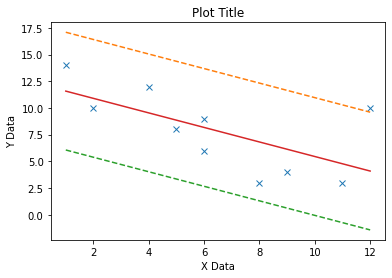


With outliers removed

Residual Mean: -2.7632217501781674e-15
Residual Standard Deviation: 1.5274768669921708
Upper Bound: 5.514783571259879
Lower Bound: -5.514783571259874
Slope: -1.1210106382978715
Y-Intercept: 14.143617021276594


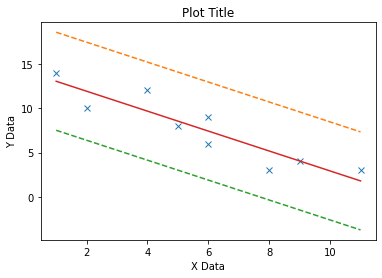

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = [1.0,2.0,4.0,6.0,5.0,6.0,9.0,8.0,11.0,12.0]
y = [14.0,10.0,12.0,9.0,8.0,6.0,4.0,3.0,3.0,10.0]

def mat_inv(A, ifit):
  if (type(A) == 'list'):
    A = np.array(A)
  
  return np.linalg.inv(A)

def get_coeffs(A, B, ifit):
  ls_coefs = np.matmul(A, B)

  return ls_coefs

def ls_coeffs(x,y, ifit):
  x2 = []
  y2 = []
  xy = []

  for i in x:
    i2 = i*i
    x2.append(i2)

  for i in y:
    i2 = i*i
    y2.append(i2)

  for (i, j) in zip(x, y):
    ij = i*j
    xy.append(ij)

  matrix = [[sum(x2), sum(x)], [sum(x), len(x)]]

  inv_matrix = mat_inv(matrix, 1)

  return get_coeffs(inv_matrix, [[sum(xy)], [sum(y)]], 1)

def compute_residuals(x, y, coeffs, ifit):
  res = []

  for i in range(len(x)):
    i_res = y[i] - (coeffs[0][0] * x[i] + coeffs[1][0])
   
    res.append(i_res)
  res_mean = mean(res)
  res_std = stand_dev(res)

  return res, res_mean, res_std

# mean
def mean(data):
  data_sum = sum(data)
  return data_sum / len(data)

# Standard Deviation
def stand_dev(data):
  return math.sqrt(variance(data))

# variance
def variance(data):
  sqr_data = []

  for val in data:
    sqr_data.append(val**2)

  variance = 1/len(data) * sum(sqr_data) - (1/len(data) * sum(data))**2
  return variance

def plot_data_and_fit(x, y, coeffs, lower_bound, upper_bound, x_label, y_label, title, ifit):
  x_vals, y_vals = best_fit_line(x, y, coeffs)
  
  plt.plot(x, y, 'x')
  plt.plot(x_vals, [y_vals[0]+upper_bound, y_vals[1]+upper_bound], '--')
  plt.plot(x_vals, [y_vals[0]+lower_bound, y_vals[1]+lower_bound], '--')
  plt.plot(x_vals, y_vals)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  
  plt.show()

def best_fit_line(x, y, coeffs):
  x1 = min(x)
  y1 = coeffs[0][0] * x1 + coeffs[1][0]
  x2 = max(x)
  y2 = coeffs[0][0] * x2 + coeffs[1][0]

  x_vals = [x1, x2]
  y_vals = [y1, y2]

  return x_vals, y_vals

def outlier_detection(res, res_mean, res_std, ndevs):
  lb = res_mean - ndevs*res_std
  ub = res_mean + ndevs*res_std

  outlier_indices = []

  for i in res:
    if i < lb or i > ub:
      outlier_indices.append(res.index(i))

  return outlier_indices

def remove_outliers(x, y, indices):
  for i in indices:
    x.pop(i)
    y.pop(i)

def fit_graph(x, y, ifit, detect_outlier=False, ub=None, lb=None):
  # get the least squares coefficients for the fit
  coeffs = ls_coeffs(x, y, ifit)

  # compute the residuals to the fit
  res,res_mean,res_std = compute_residuals(x, y, coeffs, ifit)

  # compute the error bounds
  if ub == None:
    ndevs = 2
    lb = res_mean - ndevs*res_std
    ub = res_mean + ndevs*res_std

  # plot the data, least squares fit and the error bounds
  if detect_outlier==True:
    print("May Contain Outliers\n")

  print(f"Residual Mean: {res_mean}\nResidual Standard Deviation: {res_std}\nUpper Bound: {ub}\nLower Bound: {lb}\nSlope: {coeffs[0][0]}\nY-Intercept: {coeffs[1][0]}")
  plot_data_and_fit(x, y, coeffs, lb, ub, 'X Data', 'Y Data', 'Plot Title', ifit)

  if detect_outlier == True:
    outlier_indices = outlier_detection(res,res_mean,res_std,ndevs)
    remove_outliers(x, y, outlier_indices)
    print("\nWith outliers removed\n")
    fit_graph(x, y, ifit, ub=ub, lb=lb)

# find outliers and return their indices
fit_graph(x, y, 1, True)

# using the outlier indices, remove the outliers from the x and y lists

# refit the data, using the the x,y lists with the outliers removed
# replot the data with new fit.